# Group Report Code


# Code Description
The code of each cell in this notebook corresponds to each step in the requirements which can be seen from the comments.

If you encounter an error such as no moodle named xxx, you can use pip install xxx to solve it.

In [ ]:
# Import the required packages

import numpy as np
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
'''
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
'''

"\n Variables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n"

# 1.Data Import and Preliminary Check

In [ ]:
# import data using the pandas package
with open('data.txt','r') as file:
    lines = [line.strip() for line in file.readlines()]
data_arr = []
for idx , line in enumerate(lines):
    if (idx+1)%2 == 1:
        arr = [float(x) for x in line.split(' ') if x != '']
        data_arr.append(arr)
    else:
        tmp = data_arr[-1]
        line = [float(x) for x in line.split(' ') if x != '']
        tmp.extend(line)
        assert len(tmp) == 14

df = pd.DataFrame(data_arr)
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM',\
    'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
print(df.shape)
df.head(5)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# check for missing values uning the info method

df.info()

# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


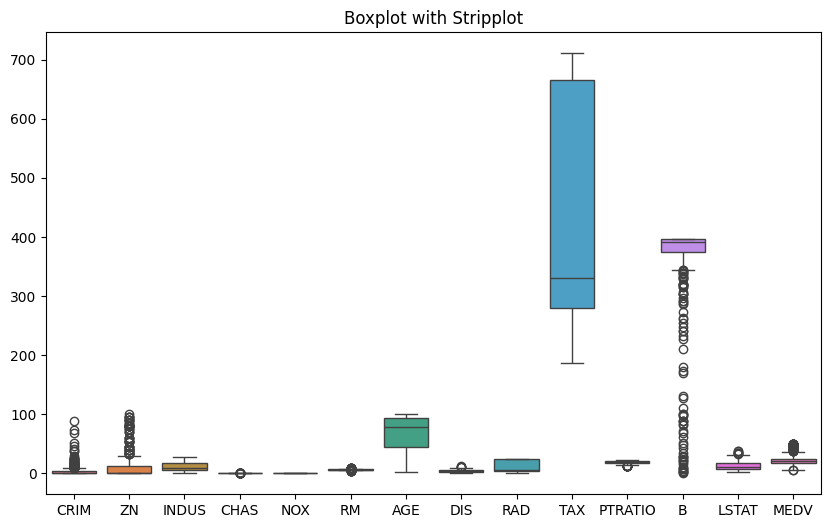

In [ ]:
# identify outliers using box plots and interquartile range

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot with Stripplot')
plt.show()


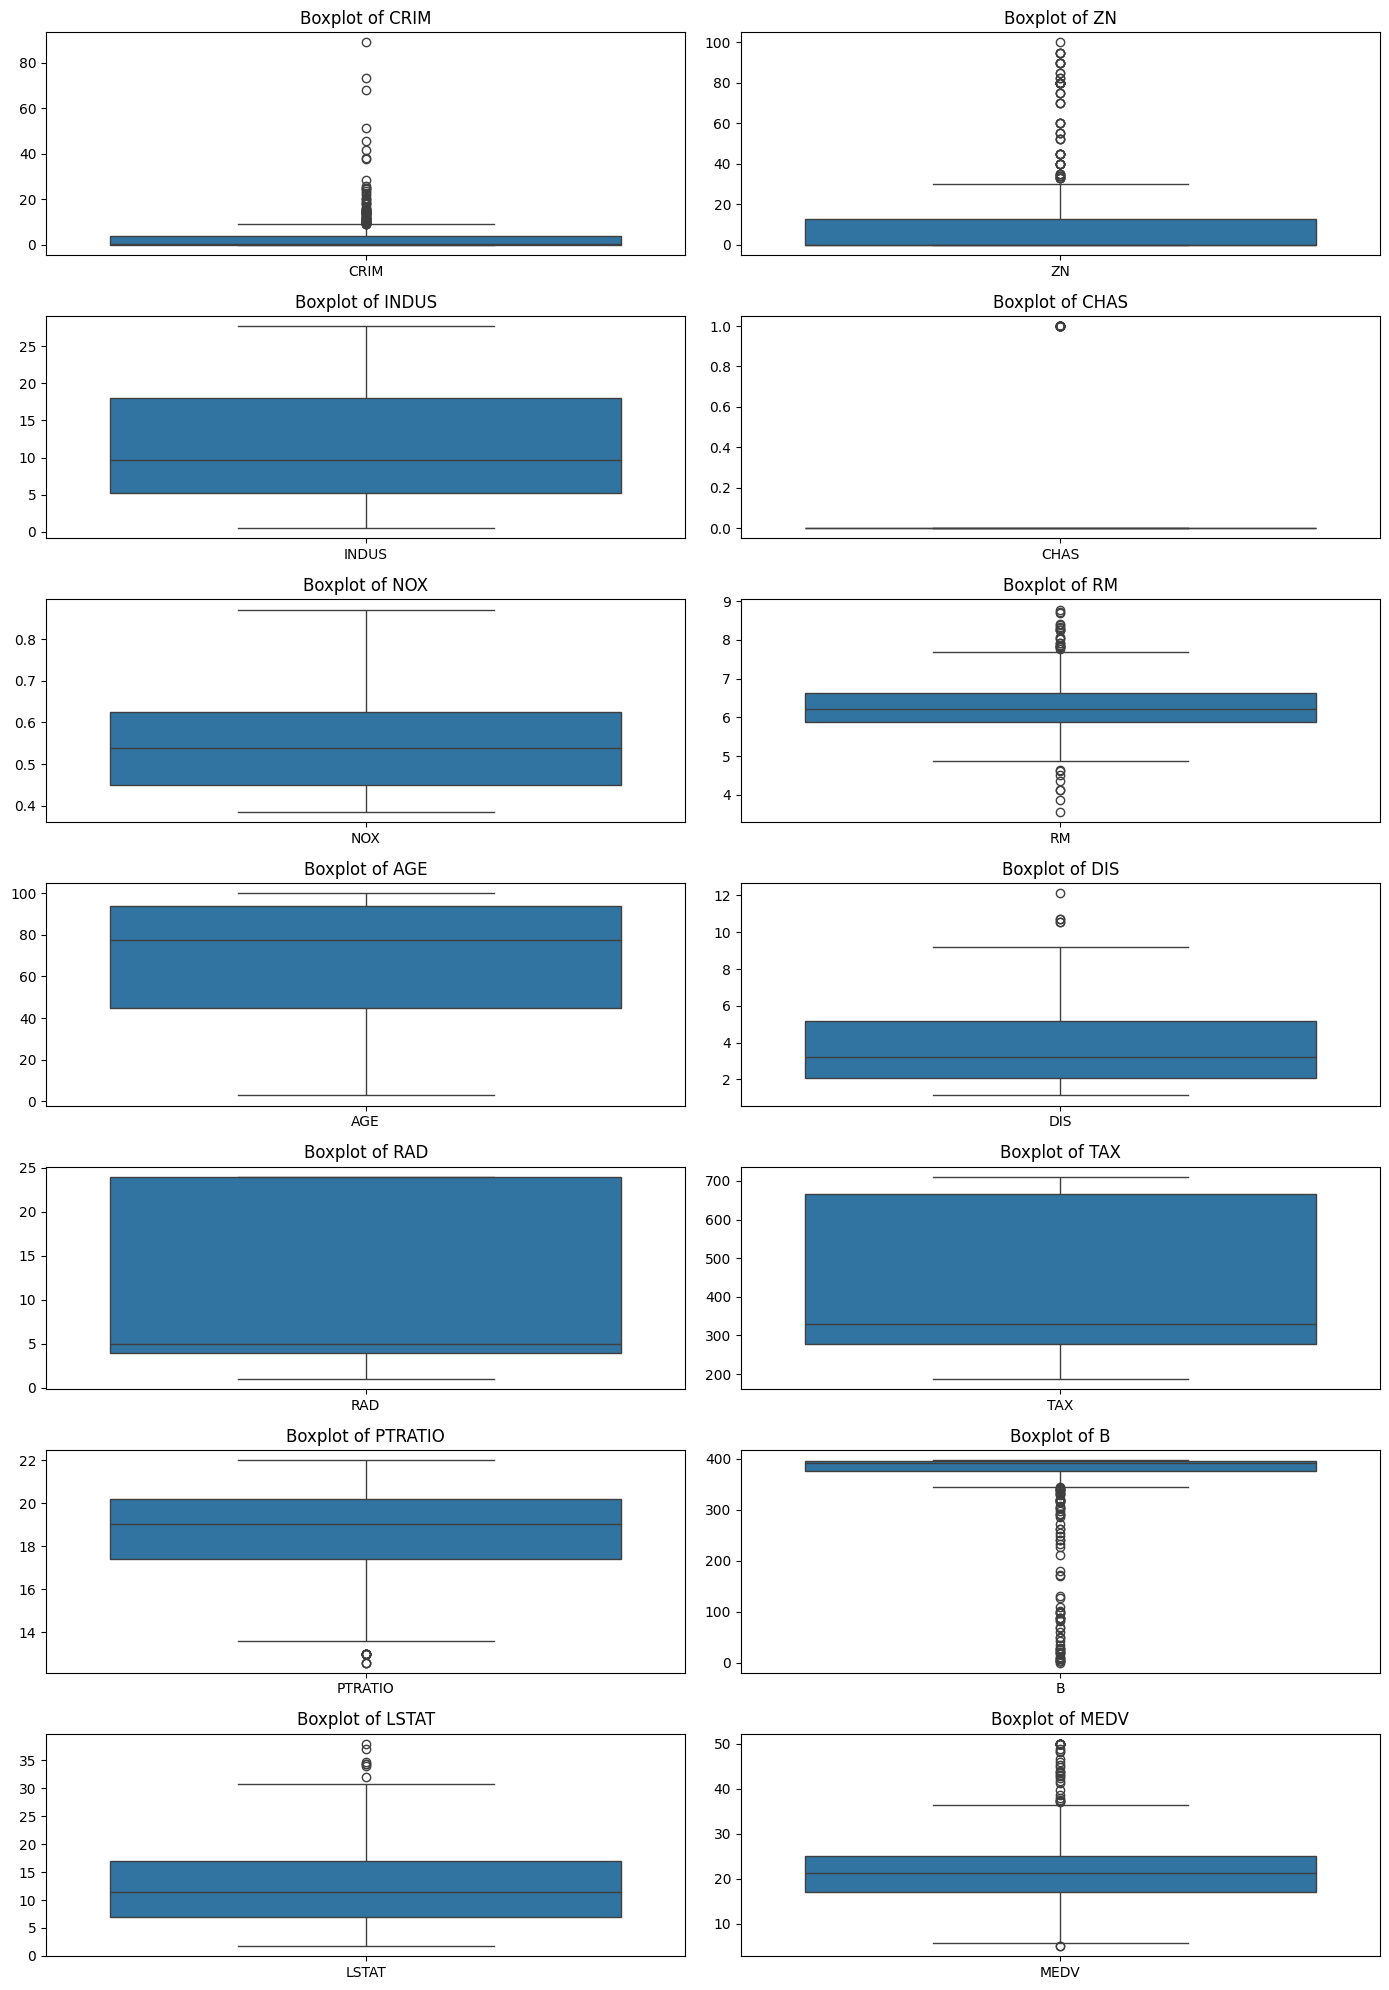

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 7x2 subgraph layout
fig, axes = plt.subplots(7, 2, figsize=(14, 20))

# Property List
attributes = df.columns

# Iterate over the attributes and draw a box plot
for i, attr in enumerate(attributes):
    row = i // 2  # Calculate row index
    col = i % 2   # Computed column indexes

    show_df = df[[attr]]  # Extract data of current attribute

    sns.boxplot(data=show_df, ax=axes[row, col])  # Draw the box plot into the corresponding subplot
    axes[row, col].set_title(f'Boxplot of {attr}')  # Set subplot title

plt.tight_layout()  # Automatically adjust subgraph layout
plt.show()


# 2. Data Visualization

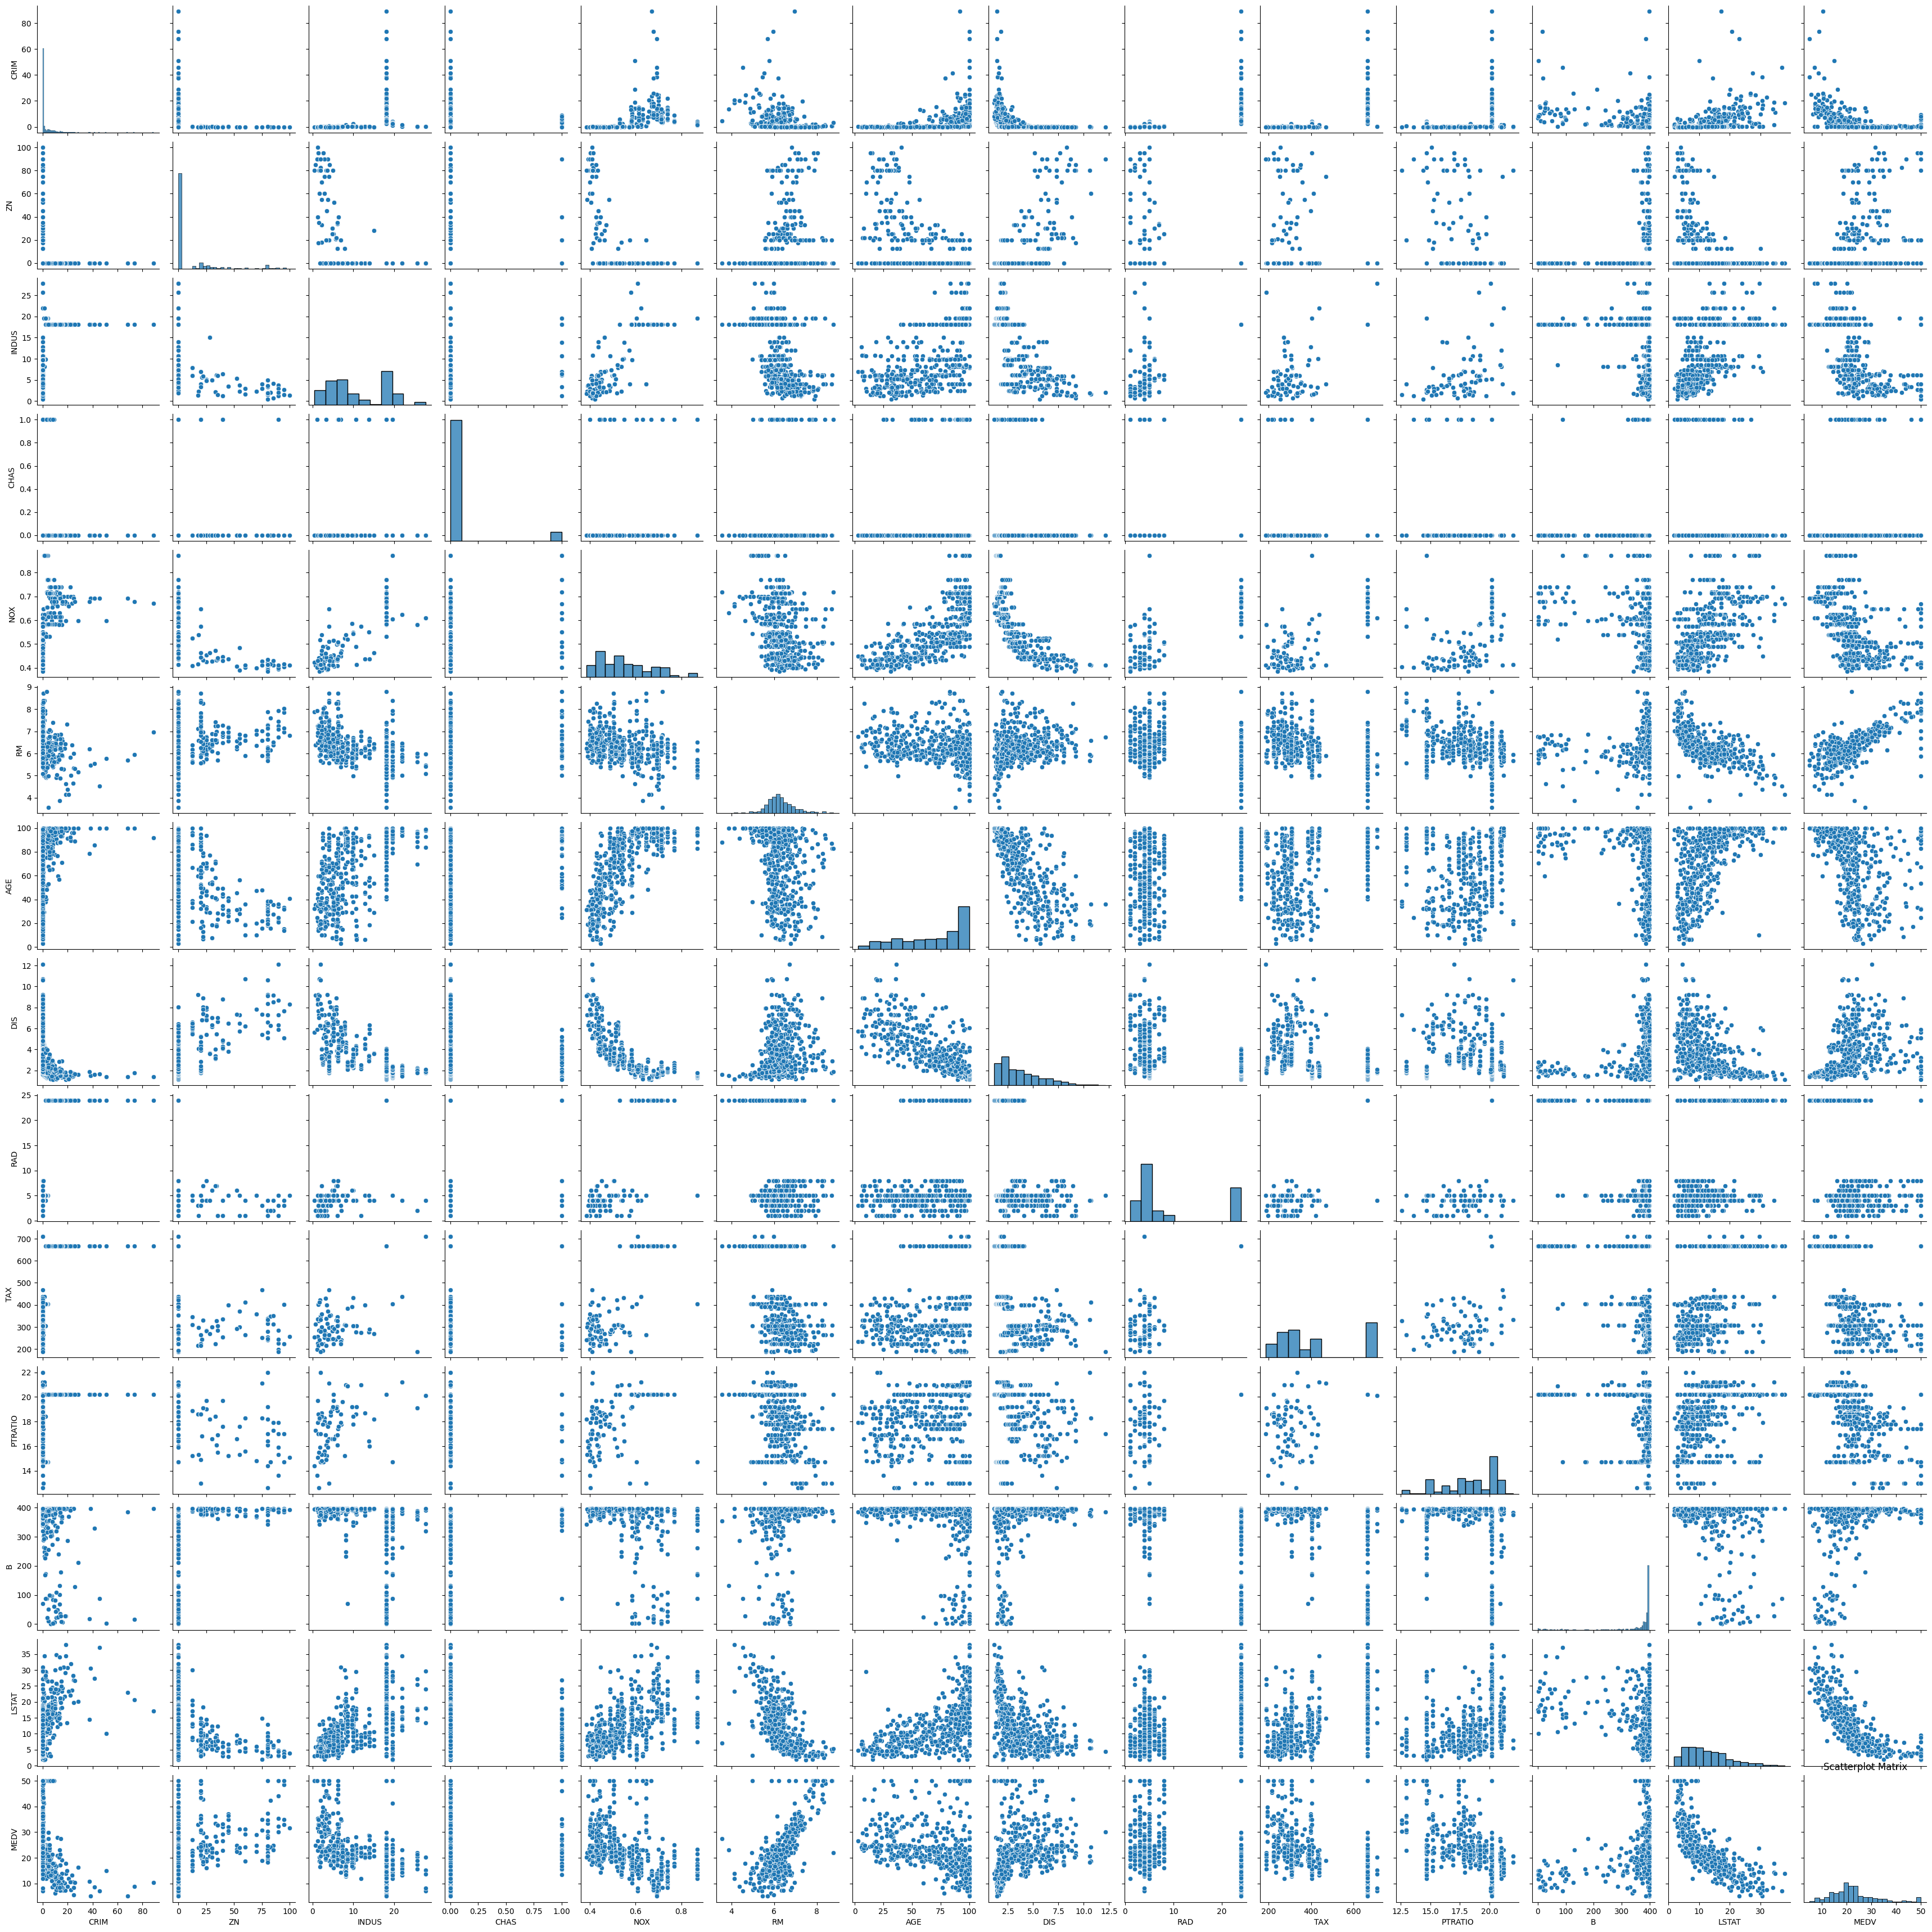

In [ ]:
# plot a scatterplot matrix and a correlation matrix heatmap to analysze relationships between variables

# Plotting a scatter matrix
sns.pairplot(df)
plt.title('Scatterplot Matrix')
plt.show()


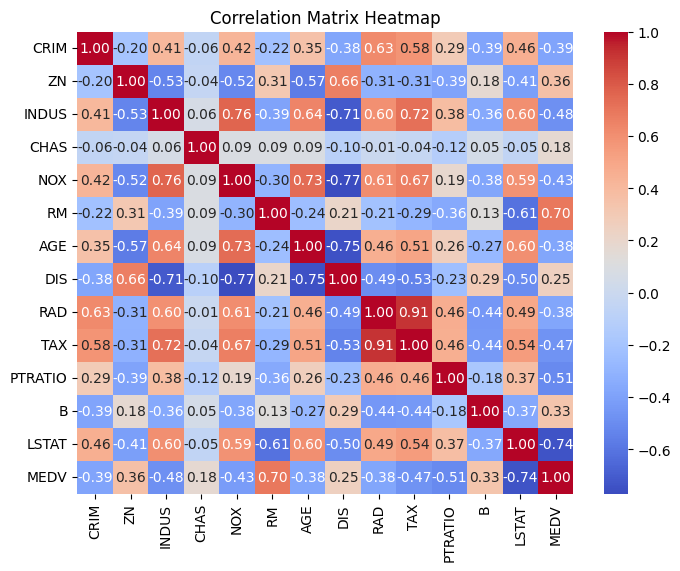

In [ ]:
# plot a scatterplot matrix and a correlation matrix heatmap to analysze relationships between variables

# Calculate the correlation coefficient matrix and draw the correlation coefficient matrix heat map
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

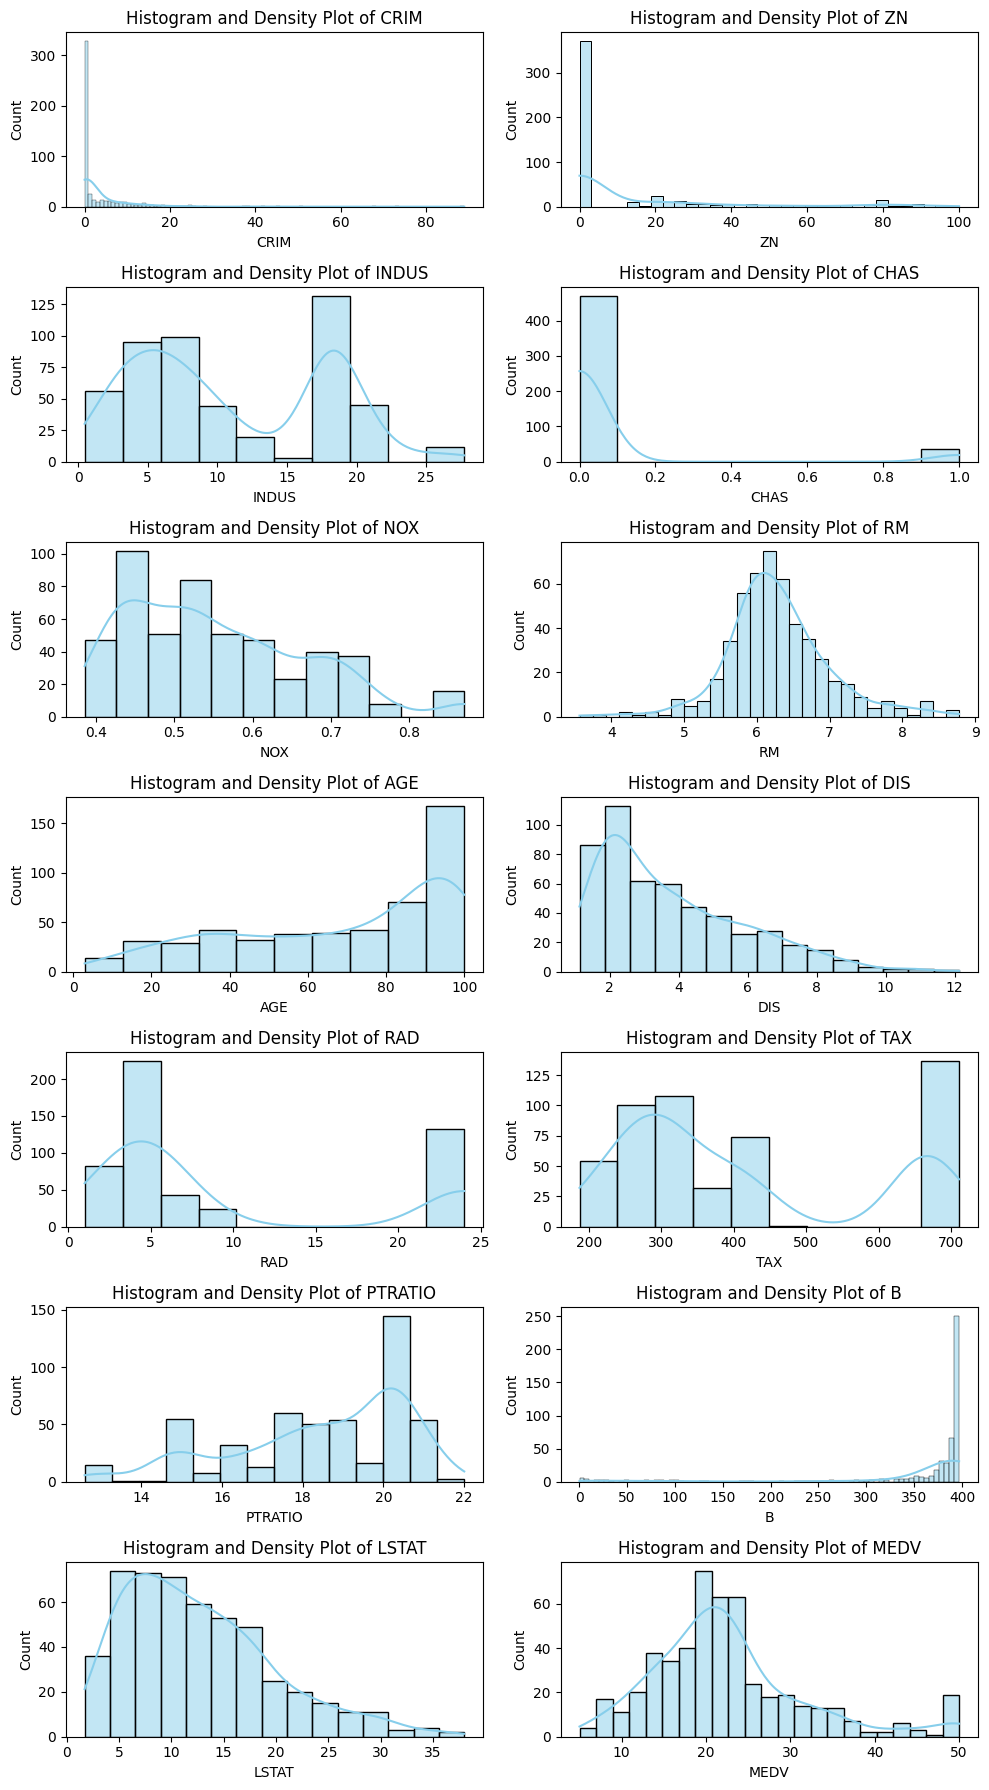

In [ ]:
# use matplotlib and searborn to plot histograms and probability density plots for each variable to unserstand preliminary data trends


fig, axs = plt.subplots(7, 2, figsize=(10, 18))
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axs[i//2, i%2], color='skyblue')
    axs[i//2, i%2].set_title(f'Histogram and Density Plot of {col}')

plt.tight_layout()
plt.show()

# 3. Data PreProcessing

Since there are no missing values ​​in the entire dataset, this step is skipped directly.

In [ ]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Divide the data set into 80% training set and 20% test set

train_df , test_df = train_test_split(df,test_size=0.2 ,random_state=0)
print(train_df.shape , test_df.shape)
# Split features and labels
train_x , train_y = train_df.drop('MEDV',axis=1) , train_df['MEDV']
test_x , test_y = test_df.drop('MEDV',axis=1) , test_df['MEDV']

(404, 14) (102, 14)


In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
train_x_scaled = scaler.fit_transform(train_x)  
test_x_scaled = scaler.transform(test_x)

# 4.Prediction Models for Housing Prices: Traning and Building


## 4.1 Regression Models

### 4.1.1 Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

# build and train a random forest model
rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(train_x, train_y)

# perform bayesian search parameter optimization using scikit-learn's BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Defining the parameter search space
param_space = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=100, num=10)],  # Number of trees
    'max_depth': [int(x) for x in np.linspace(3, 15, num=10)],  # Maximum depth of the tree
    'min_samples_leaf': [int(x) for x in np.linspace(1, 10, num=10)],  # Minimum number of samples for leaf nodes
    'bootstrap': [True, False]  # Whether to use self-service sampling
}

# Initialize random search
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_space,
    n_iter=50,  # Iterations
    cv=5,  # Number of cross validation folds
    scoring='neg_mean_squared_error',  # Evaluation Metrics
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Run a random search
random_search.fit(train_x, train_y)

# Output the best parameters and best score
print("Optimal parameters:", random_search.best_params_)
print("Best Rating:", -random_search.best_score_)

Optimal parameters: {'n_estimators': 80, 'min_samples_leaf': 1, 'max_depth': 15, 'bootstrap': True}
Best Rating: 12.143074426266342


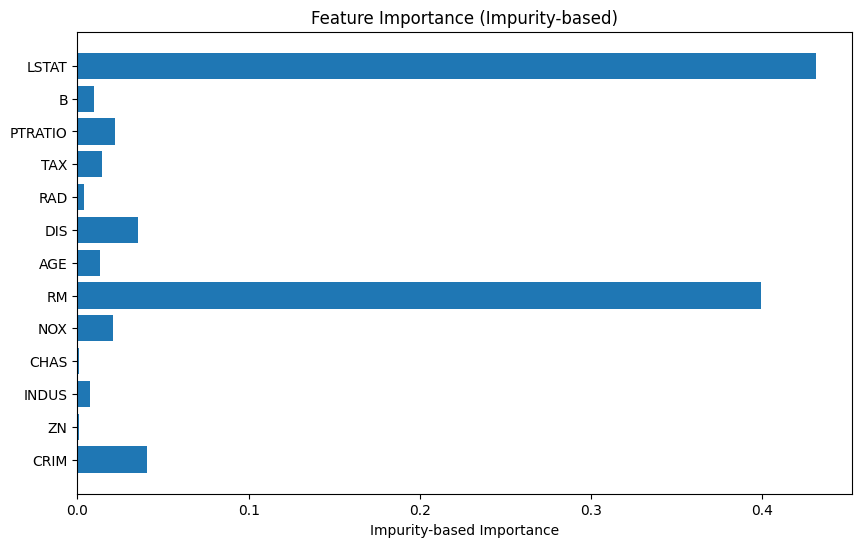

In [ ]:
# calculate and plot feature importance(impurity-based vs. permutation importance)

# Calculating impurity-based feature importance
impurity_importances = rf_regressor.feature_importances_

# Calculating permutation feature importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf_regressor, test_x, test_y, n_repeats=30, random_state=42)
perm_sorted_idx = perm_importance.importances_mean.argsort()

# Feature Name
feature_names = train_x.columns

# Plotting feature importance based on impurity
plt.figure(figsize=(10, 6))
plt.barh(range(len(impurity_importances)), impurity_importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Impurity-based Importance')
plt.title('Feature Importance (Impurity-based)')
plt.show()

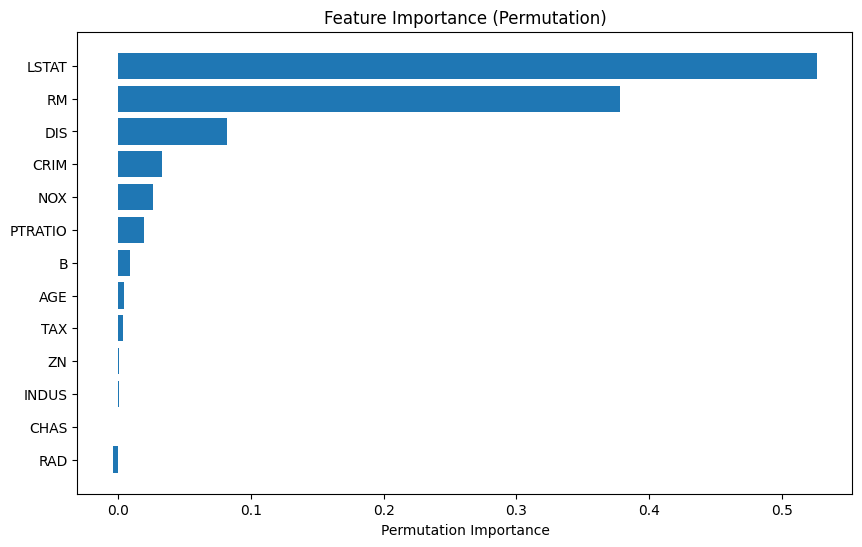

In [ ]:
# Plotting permutation feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(perm_importance.importances_mean)), perm_importance.importances_mean[perm_sorted_idx], align='center')
plt.yticks(np.arange(len(feature_names)), np.array(feature_names)[perm_sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()

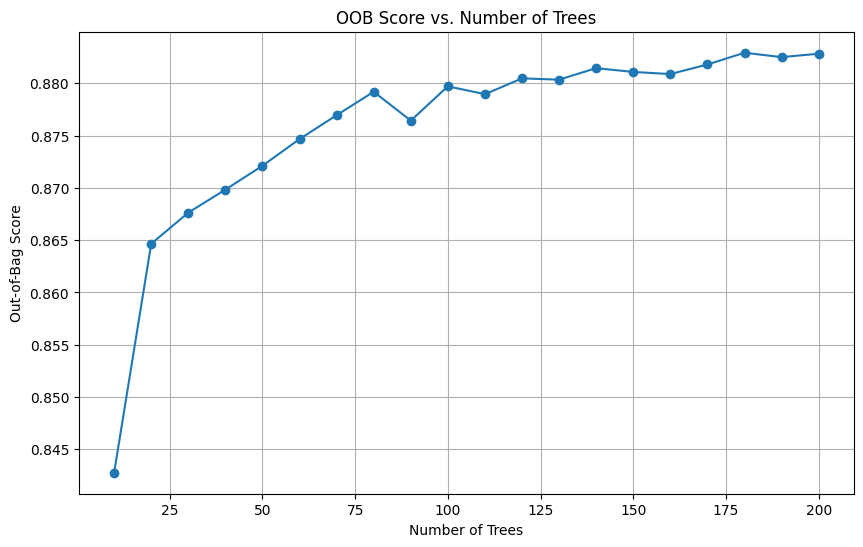

The number of optimal trees: 180


In [ ]:
# plot how the models's loss changes with and increase in the number of trees and determine the optimal number of trees

# Calculate the oob_score_ of the random forest model
trees_range = range(10, 201, 10)
oob_scores = []

for n_trees in trees_range:
    rf_regressor = RandomForestRegressor(n_estimators=n_trees, oob_score=True, random_state=42)
    rf_regressor.fit(train_x, train_y)
    oob_scores.append(rf_regressor.oob_score_)

# Plot oob_score as the number of trees changes
plt.figure(figsize=(10, 6))
plt.plot(trees_range, oob_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Score')
plt.title('OOB Score vs. Number of Trees')
plt.grid(True)
plt.show()

# Determining the optimal number of trees
optimal_n_trees = trees_range[np.argmax(oob_scores)]
print("The number of optimal trees:", optimal_n_trees)


### 4.1.2 support vector machine(SVM)


In [ ]:
# estabilish and train an SVM regression model(SVR) using the scikit-learn library

from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Initializing the SVR model
svr_regressor = make_pipeline(StandardScaler(), SVR())
# Training the SVR model
svr_regressor.fit(train_x, train_y)

# Make predictions on the training set
y_pred_train_svr = svr_regressor.predict(train_x)

# Calculate the mean square error on the training set
mse_train_svr = mean_squared_error(train_y, y_pred_train_svr)
print("Mean square error of the SVR model on the training set:", mse_train_svr)

Mean square error of the SVR model on the training set: 24.036197481092167


In [ ]:
# apply bayesian search to optimize the kernel type and other parameters

# Define SVR parameter search space
param_space_svr = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Nuclear Type
    'svr__C': (1e-6, 1e+6, 'log-uniform'),  # Regularization parameter
    'svr__gamma': (1e-6, 1e+1, 'log-uniform'),  # Kernel coefficients for 'rbf', 'poly', 'sigmoid'
    'svr__degree': (1, 10),  # The degree of the 'poly' kernel
    'svr__coef0': (-10, 10),  # 'poly', 'sigmoid' kernel function independent coefficients
}

# Define SVR Bayesian search and save the scores for the training and validation sets
bayes_search_svr = BayesSearchCV(
    estimator=svr_regressor,
    search_spaces=param_space_svr,
    n_iter=50,  # Iterations
    cv=5,  # Number of cross validation folds
    scoring='neg_mean_squared_error',  # Evaluation Metrics
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    return_train_score=True  # Save the scores of the training set and the validation set
)

# Run SVR Bayesian Search
bayes_search_svr.fit(train_x, train_y)

# Output SVR optimal parameters, best score, training set and validation set scores
print("SVR Optimal Parameters:", bayes_search_svr.best_params_)
print("SVR Best Rating:", -bayes_search_svr.best_score_)
print("SVR training set scoring:", -bayes_search_svr.cv_results_['mean_train_score'])
print("SVR validation set scoring:", -bayes_search_svr.cv_results_['mean_test_score'])


SVR Optimal Parameters: OrderedDict([('svr__C', 5607.275056505338), ('svr__coef0', -7), ('svr__degree', 6), ('svr__gamma', 0.4162492539230118), ('svr__kernel', 'rbf')])
SVR Best Rating: 20.24737707050408
SVR training set scoring: [8.62569531e+01 2.55617546e+11 2.18786854e+01 9.77496331e-03
 6.59703577e+07 8.67007367e+01 3.53684766e-02 9.86714426e-03
 6.30192133e+08 8.67007483e+01 8.66988651e+01 3.74321857e+07
 8.67007465e+01 7.67314110e+01 8.66696541e+01 8.37106643e+01
 8.66749313e+01 3.02226652e+01 8.61336583e+01 8.46843875e+01
 8.57587558e+01 8.47968131e+01 8.36726256e+01 8.58885088e+01
 8.48435631e+01 8.48587507e+01 8.66530437e+01 8.16624191e+01
 8.66337221e+01 8.17074745e+01 2.13561085e+01 2.13696718e+01
 2.14166155e+01 7.78036089e+01 8.63160193e+01 2.16775677e+01
 2.12997498e+01 2.13488566e+01 8.63294570e+01 8.33883380e+01
 2.13041357e+01 8.65764359e+01 2.13017206e+01 2.12725133e+01
 2.16111126e+01 2.12725085e+01 8.66013504e+01 8.63910030e+01
 2.13272273e+01 8.58198514e+01]
SVR va

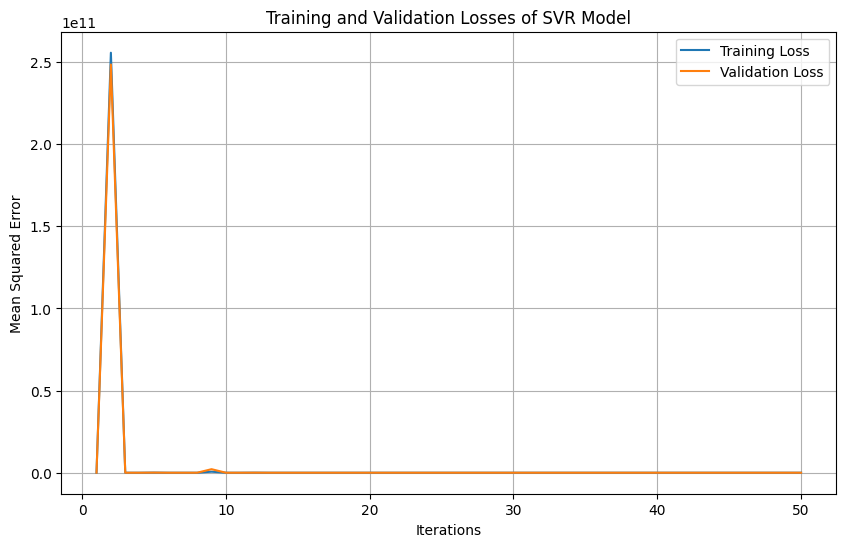

In [ ]:
# Get the training set and validation set loss of the SVR model
train_losses = -bayes_search_svr.cv_results_['mean_train_score']
val_losses = -bayes_search_svr.cv_results_['mean_test_score']

# Plot the loss curves for the training set and validation set
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss',)
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Losses of SVR Model')
plt.legend()
plt.grid(True)
plt.show()


### 4.1.3 Deep Nerual Network(DNN)


In [ ]:
# build a nerual network model using the keras library to predict housing prices.

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
history = model.fit(X_train_scaled, train_y , epochs=100, batch_size=32, validation_data=(X_test_scaled, test_y))

# Evaluate the model
mse_train_nn = model.evaluate(X_train_scaled, train_y, verbose=0)
mse_test_nn = model.evaluate(X_test_scaled, test_y, verbose=0)
print("Neural Network Model Train MSE:", mse_train_nn)
print("Neural Network Model Test MSE:", mse_test_nn)


Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 606.4059 - val_loss: 565.7551
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 570.7425 - val_loss: 532.1647
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 534.1197 - val_loss: 491.7346
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 486.3429 - val_loss: 437.2269
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 422.9215 - val_loss: 368.9110
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 344.2364 - val_loss: 291.7630
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 256.6295 - val_loss: 212.2844
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 171.0854 - val_loss: 145.2223
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 107.8166 - val_loss: 101.8756
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss

In [ ]:
# use kerasTuner for hyperparameter tuning of the model, such as layers, node counts, learning rate, and activation functions.

from kerastuner.tuners import RandomSearch
from keras.layers import Activation

# Define the hyperparameter search space
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=128, step=32),
                    input_dim=X_train_scaled.shape[1]))
    model.add(Activation(hp.Choice('activation_input', values=['relu', 'tanh', 'sigmoid'])))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32)))
        model.add(Activation(hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    return model

# Initialize the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Number of hyperparameter combinations to try
    directory='keras_tuner',
    project_name='housing_prices'
)

# Perform hyperparameter tuning
tuner.search(X_train_scaled, train_y,
             epochs=100,
             validation_data=(X_test_scaled, test_y))

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hp)

# Build the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hp)
final_model.summary()

# Train the final model
history_final = final_model.fit(X_train_scaled, train_y, epochs=100, batch_size=32, validation_data=(X_test_scaled, test_y), verbose=1)

# Evaluate the final model
mse_train_final = final_model.evaluate(X_train_scaled, train_y, verbose=0)
mse_test_final = final_model.evaluate(X_test_scaled, test_y, verbose=0)
print("Final Model Train MSE:", mse_train_final)
print("Final Model Test MSE:", mse_test_final)


Reloading Tuner from keras_tuner\housing_prices\tuner0.json
Best Hyperparameters:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                      

C:\Users\Leo Luo\AppData\Local\Temp\ipykernel_9968\1790956119.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


13/13 [==============================] - 1s 12ms/step - loss: 564.4031 - val_loss: 494.1393
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 457.6985 - val_loss: 369.4608
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 330.1742 - val_loss: 260.3180
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 239.4516 - val_loss: 191.2261
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 179.9191 - val_loss: 143.6561
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 137.3136 - val_loss: 112.1482
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 109.2048 - val_loss: 93.7828
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 94.8400 - val_loss: 84.6754
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 87.6256 - val_loss: 81.8808
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 85.5821 - val_l

Epoch 1/100
13/13 [==============================] - 0s 7ms/step - loss: 1.1357 - val_loss: 15.8728
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 1.1039 - val_loss: 15.7455
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1954 - val_loss: 14.7296
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1623 - val_loss: 15.7370
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1575 - val_loss: 15.1198
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 1.2801 - val_loss: 15.2522
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1201 - val_loss: 15.6282
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1518 - val_loss: 15.5957
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1515 - val_loss: 15.4759
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 1.0410 - val_loss: 15.1197

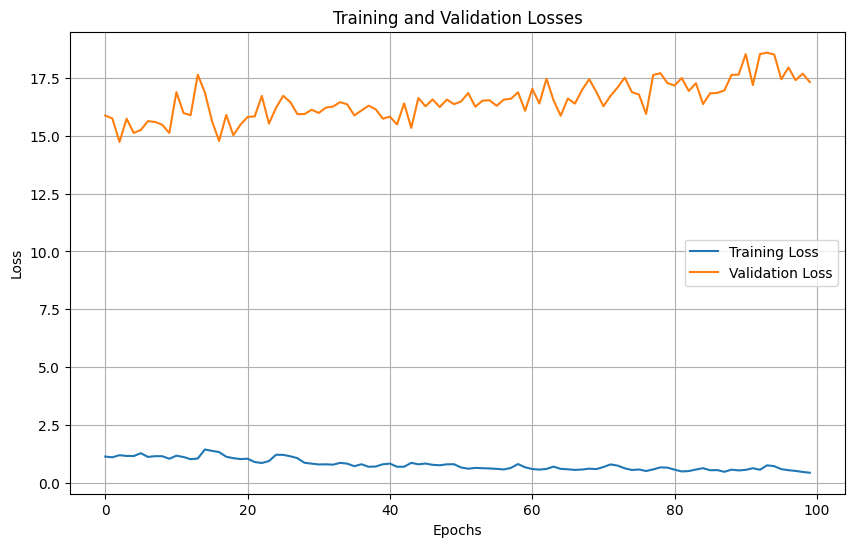

In [ ]:
# train the model and plot the relationship between loss and training epochs for the best model

import matplotlib.pyplot as plt

# Train the final model
history_final = final_model.fit(X_train_scaled, train_y, epochs=100, batch_size=32, validation_data=(X_test_scaled, test_y), verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_final.history['loss'], label='Training Loss')
plt.plot(history_final.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()



## 4.2 Classification Models


In [ ]:
# categorize housing prices into three classes: low, medium, and high

MEDV = sorted(df['MEDV'].tolist())
length = len(MEDV)
low_medium_price , medium_high_price = MEDV[int(length/3)] , MEDV[int(length * 2 / 3)]
print(f'min {min(MEDV)} max {max(MEDV)}')
print(f'low_medium_price {low_medium_price} medium_high_price {medium_high_price}')
df['price_type'] = df['MEDV'].apply(lambda x : 'low' if x<low_medium_price else 'medium' if x>=low_medium_price and x<medium_high_price else 'high'  )
label_map = {'low':0,'medium':1,'high':2}
df['price_index'] = df['price_type'].apply(lambda x:label_map[x])



# Remove tag content
X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['price_index']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



min 5.0 max 50.0
low_medium_price 18.8 medium_high_price 23.7


### 4.2.1 RF

In [ ]:
#  build and train a random forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7058823529411765


In [ ]:
# conduct hyperparameter tuing using scikit-learn's grid search strategy.
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],  # Number of decision trees
    'max_depth': [None, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required for internal node repartitioning
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples for leaf nodes
}


grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform a grid search on the training set
grid_search.fit(X_train, y_train)

# Output the best parameter combination
print("The best parameter combination:", grid_search.best_params_)

# The model with the best parameters makes predictions on the test set
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy after tuning:", accuracy)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
The best parameter combination: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Model accuracy after tuning: 0.7156862745098039


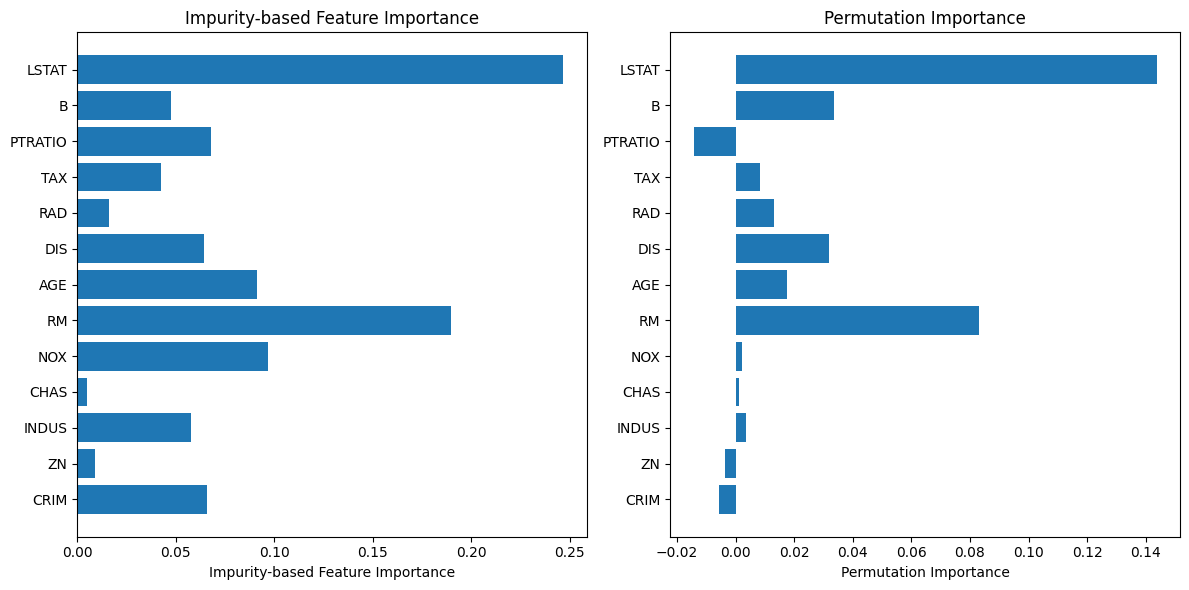

In [ ]:
# calculate and plot feature importance(impurity-based vs. permutation importance).
import matplotlib.pyplot as plt
import numpy as np

# Calculating impurity-based feature importance
feature_importance_impurity = best_rf_classifier.feature_importances_

# Calculating Permutation Importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_rf_classifier, X_test, y_test, n_repeats=30, random_state=42)
feature_importance_perm = perm_importance.importances_mean

# Feature Name
feature_names = X.columns

# Plotting feature importance
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Impurity-based feature importance
ax[0].barh(range(len(feature_importance_impurity)), feature_importance_impurity, align='center')
ax[0].set_yticks(np.arange(len(feature_importance_impurity)))
ax[0].set_yticklabels(feature_names)
ax[0].set_xlabel('Impurity-based Feature Importance')
ax[0].set_title('Impurity-based Feature Importance')

# Ranking Importance
ax[1].barh(range(len(feature_importance_perm)), feature_importance_perm, align='center')
ax[1].set_yticks(np.arange(len(feature_importance_perm)))
ax[1].set_yticklabels(feature_names)
ax[1].set_xlabel('Permutation Importance')
ax[1].set_title('Permutation Importance')

plt.tight_layout()
plt.show()


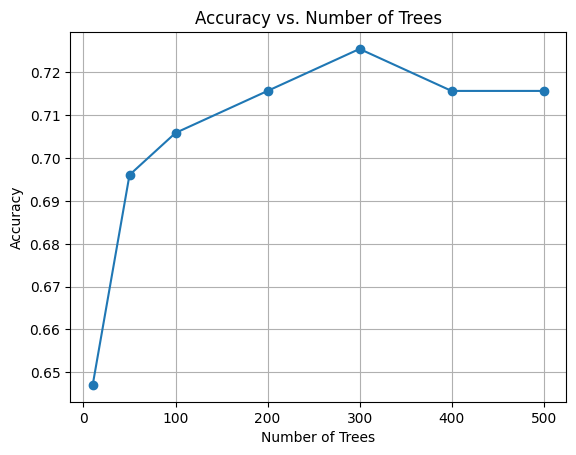

The optimal number of trees: 300


In [ ]:
# plot how the model's accuracy changes with and increase in the number of trees and determine the optimial

# Defines the range of numbers of trees to try
n_estimators_range = [10, 50, 100, 200, 300, 400, 500]

# Initialize an empty list to store the model accuracy for each number of trees
accuracy_scores = []

# Traverse the number of trees, train the model and calculate the accuracy
for n_estimators in n_estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting the model accuracy as a function of the number of trees
plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees')
plt.grid(True)
plt.show()

# Determining the optimal number of trees
best_n_estimators = n_estimators_range[np.argmax(accuracy_scores)]
print("The optimal number of trees:", best_n_estimators)


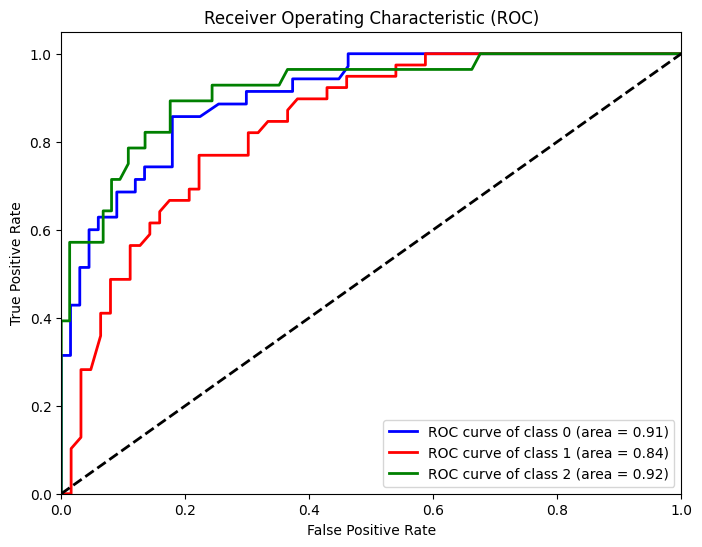

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Convert the target variable into binary form
y_bin = label_binarize(y_test, classes=[0, 1, 2])

# Initialize the Random Forest Classifier (using the best parameters)
rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_classifier.fit(X_train, y_train)

# Calculate the ROC curve and AUC for each category
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Three categories
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], rf_classifier.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### 4.2.2 SVM

In [ ]:
# estabilish and train an SVM classification model(SVC) using the scikit-learn library
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Train the SVM model on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM model accuracy:", svm_accuracy)


SVM model accuracy: 0.6666666666666666


In [ ]:
# apply random search for optimizing kernel type and other parameters

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution to be tuned
param_dist = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(1, 5)
}

# Initialize random search
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)
print("The best parameter combination:", random_search.best_params_)

# The model with the best parameters makes predictions on the test set
best_svm_classifier = random_search.best_estimator_
svm_y_pred = best_svm_classifier.predict(X_test)
# Calculate prediction accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM model accuracy after tuning:", svm_accuracy)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
The best parameter combination: {'degree': 1, 'kernel': 'linear'}
SVM model accuracy after tuning: 0.6666666666666666


Another Method

In [ ]:
# Ensure that the target variable is numeric and drop NaN values
data = df
data['MEDV'] = pd.to_numeric(data['MEDV'], errors='coerce')
data = data.dropna(subset=['MEDV'])

# Define the feature matrix and target vector
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Re-categorize the target variable into three equal-sized bins
y_equal_bins = pd.qcut(y, q=3, labels=['low', 'medium', 'high'])

In [ ]:
# Update target variable y with new equal-sized bins
y = y_equal_bins

# Split the data into training and test sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with scaling and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define the parameter grid for random search
param_grid = {
    'svc__C': [0.1, 1, 10, 100, 1000],
    'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=50, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc', SVC())]),
                   n_iter=50,
                   param_distributions={'svc__C': [0.1, 1, 10, 100, 1000],
                                        'svc__gamma': [1, 0.1, 0.01, 0.001,
                                                       0.0001],
                                        'svc__kernel': ['linear', 'poly', 'rbf',
                                                        'sigmoid']},
                   random_state=42, scoring='accuracy')

In [ ]:
# Predict on the test set
y_pred = random_search.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
best_params = random_search.best_params_

accuracy, best_params

(0.7549019607843137, {'svc__kernel': 'rbf', 'svc__gamma': 0.01, 'svc__C': 100})

### 4.2.3 DNN


In [ ]:
# Estabilish and train and DNN classification model using the keras library

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam,SGD
from keras.utils import to_categorical

# Convert the target variable to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Initializing the DNN model
dnn_model = Sequential()
dnn_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
dnn_model.add(Dense(units=32, activation='relu'))
dnn_model.add(Dense(units=3, activation='softmax'))
dnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = dnn_model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, validation_data=(X_test, y_test_categorical))

# Evaluating the Model
loss, accuracy = dnn_model.evaluate(X_test, y_test_categorical)
print("DNN model accuracy:", accuracy)



Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 24.7274 - accuracy: 0.2574 - val_loss: 10.2986 - val_accuracy: 0.3137
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 7.0455 - accuracy: 0.4975 - val_loss: 6.5043 - val_accuracy: 0.4706
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 3.4582 - accuracy: 0.4926 - val_loss: 2.2280 - val_accuracy: 0.5000
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 1.6401 - accuracy: 0.5272 - val_loss: 1.5905 - val_accuracy: 0.4706
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.9634 - accuracy: 0.5866 - val_loss: 1.4037 - val_accuracy: 0.5196
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 1.0440 - accuracy: 0.5965 - val_loss: 1.1828 - val_accuracy: 0.6471
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7953 - accuracy: 0.6139 - val_loss: 1.2020 - val_accuracy: 0.5490
Epoch 8/10

In [ ]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Defining the hyperparameter search space
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                    activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16),
                    activation='relu'))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='dnn_tuning'
)
# Performing a hyperparameter search
tuner.search(X_train, y_train_categorical, epochs=10, validation_data=(X_test, y_test_categorical))
# Get the best model architecture and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Output the best model architecture and hyperparameters
print("Best Model Architecture:", best_model.summary())
print("Best hyperparameters:", best_hyperparameters)


Reloading Tuner from my_dir\dnn_tuning\tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 10243 (40.01 KB)
Trainable params: 10243 (40.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Best Model Architecture: None
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x0000024E9BDD3850>


In [ ]:
X_test.shape

(102, 13)

# 5. model evaluation and comparison

In [ ]:
# Evaluate the performance of models using root mean square error(RMSE) for regression models and accuracy for classification models

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 1. Regression

X_train = X_train[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
X_test = X_test[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]

# rfr
rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('rf_rmse : ',rf_rmse)

# SVM
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svr_regressor = make_pipeline(StandardScaler(), SVR())
svr_regressor.fit(X_train, y_train)
y_pred = svr_regressor.predict(X_test)
svr_rmse =np.sqrt(mean_squared_error(y_test, y_pred))
print('svr_rmse : ',svr_rmse)

# DNN
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
history = model.fit(X_train_scaled, y_train , epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test),verbose=0)
dnn_rmse = np.sqrt(model.evaluate(X_test_scaled, y_test , verbose=0))
print('dnn_rmse : ',dnn_rmse)
# 2. classification
# Data processing
# categorize housing prices into three classes: low, medium, and high
length = len(MEDV)
low_medium_price , medium_high_price = MEDV[int(length/3)] , MEDV[int(length * 2 / 3)]
print(f'min {min(MEDV)} max {max(MEDV)}')
print(f'low_medium_price {low_medium_price} medium_high_price {medium_high_price}')
df['price_type'] = df['MEDV'].apply(lambda x : 'low' if x<low_medium_price else 'medium' if x>=low_medium_price and x<medium_high_price else 'high'  )
label_map = {'low':0,'medium':1,'high':2}
df['price_index'] = df['price_type'].apply(lambda x:label_map[x])
# Remove tag content
X = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = df['price_index']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# rf
rf_classifier = RandomForestClassifier(n_estimators=100,)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print('rf_acc : ',rf_acc)
# svc
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)
svm_acc = accuracy_score(y_test, svm_y_pred)
print("svm_acc :", svm_acc)
# dnn
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
# Convert the target variable to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
# Initializing the DNN model
dnn_model = Sequential()
dnn_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
dnn_model.add(Dense(units=32, activation='relu'))
dnn_model.add(Dense(units=3, activation='softmax'))
dnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = dnn_model.fit(X_train, y_train_categorical, epochs=100, batch_size=32, validation_data=(X_test, y_test_categorical),verbose=0)
# Evaluating the Model
loss, dnn_acc = dnn_model.evaluate(X_test, y_test_categorical,verbose=0)
print("dnn_acc :", dnn_acc)



rf_rmse :  0.539966411446301
svr_rmse :  0.5275563816178297
dnn_rmse :  0.5477098903970024
min 5.0 max 50.0
low_medium_price 18.8 medium_high_price 23.7
rf_acc :  0.7156862745098039
svm_acc : 0.6666666666666666
dnn_acc : 0.6764705777168274


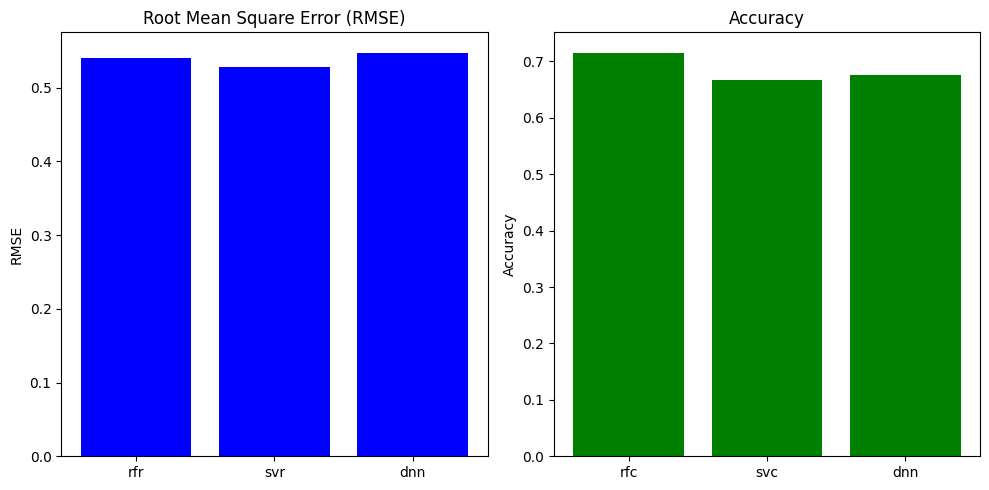

In [ ]:
import matplotlib.pyplot as plt

# Assume that rmse_values ​​and accuracy_values ​​are the values ​​of RMSE and accuracy you calculated.

# Plotting RMSE histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['rfr','svr','dnn'], [rf_rmse,svr_rmse,dnn_rmse], color='blue')
plt.title('Root Mean Square Error (RMSE)')
plt.ylabel('RMSE')

# Draw an accuracy bar graph
plt.subplot(1, 2, 2)
plt.bar(['rfc','svc','dnn'], [rf_acc,svm_acc,dnn_acc], color='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


compare the performance of different models and analyze the strengths and weaknesses of each

From the comparison chart above, we can see that for this housing price prediction dataset:

1. Housing price regression problem, the effect is: SVR>RFR>DNN

2. Housing price classification problem, the effect is: RFC>DNN>SVC

4/4 [==============================] - 0s 2ms/step


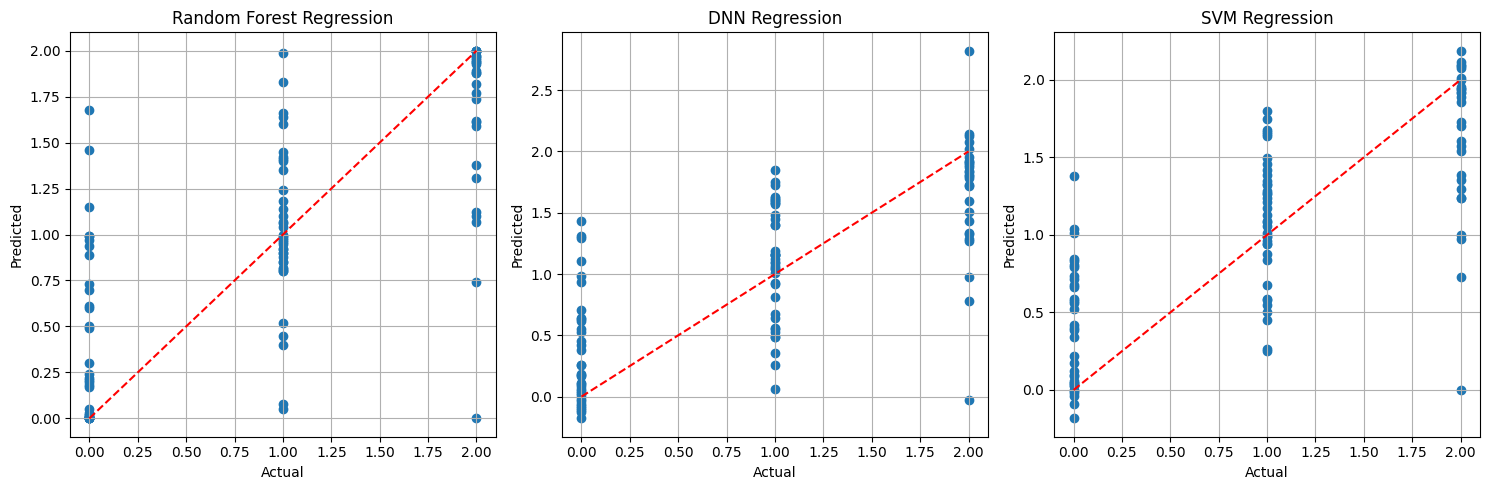

Random Forest Regression R²: 0.5243172338090012
DNN Regression R²: 0.510576185034034
SVM Regression R²: 0.545931172163338


In [ ]:
# for regressiong models, plot scatter plots of predicted vs. actual values using the test set for RF, DNN, and SVM models to assess prediction accuracy and calculate the R2 value

from sklearn.metrics import r2_score

# Assume rf_regression_model, dnn_model and svm_model are your random forest regression model, DNN model and SVM model
# Assume X_test and y_test are the features and target variables of the test set

# Use the model to predict the target variable value of the test set
rf_y_pred = rf_regressor.predict(X_test)
svm_y_pred = svr_regressor.predict(X_test)
dnn_y_pred = model.predict(scaler.transform(X_test))


# Draw a scatter plot of the predicted values ​​​​and actual values ​​​​of the random forest regression model
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, rf_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add diagonal guides
plt.grid(True)

# Draw a scatter plot of the DNN model's predicted values ​​and actual values
plt.subplot(1, 3, 2)
plt.scatter(y_test, dnn_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('DNN Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add diagonal guides
plt.grid(True)

# Draw a scatter plot of the SVM model's predicted values ​​and actual values
plt.subplot(1, 3, 3)
plt.scatter(y_test, svm_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add diagonal guides
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculating the R² value
rf_r2 = r2_score(y_test, rf_y_pred)
dnn_r2 = r2_score(y_test, dnn_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)

print("Random Forest Regression R²:", rf_r2)
print("DNN Regression R²:", dnn_r2)
print("SVM Regression R²:", svm_r2)


In [ ]:
# For classification models, calculate accuracy on the test set and provide predicted labels for each sample

# Calculate the accuracy of the random forest classification model on the test set
rf_accuracy = rf_classifier.score(X_test, y_test)
print("Random Forest Classifier Accuracy:", rf_accuracy)

# Calculate the accuracy of the best SVM classification model on the test set
svm_accuracy = svm_classifier.score(X_test, y_test)
print("Best SVM Classifier Accuracy:", svm_accuracy)

# Calculate the accuracy of the best DNN classification model on the test set
dnn_accuracy = dnn_model.evaluate(X_test, y_test_categorical,verbose=0)[1]
print("Best DNN Classifier Accuracy:", dnn_accuracy)

# Get the predicted labels of the random forest classification model on the test set
rf_y_pred = rf_classifier.predict(X_test)

# Get the predicted labels of the best SVM classification model on the test set
svm_y_pred = svm_classifier.predict(X_test)

# Get the predicted labels of the best DNN classification model on the test set
dnn_y_pred = np.argmax(dnn_model.predict(X_test,verbose=0), axis=-1)

# Print the predicted labels for the first 10 samples
print("Random Forest Predicted Labels:", rf_y_pred[:10])
print("Best SVM Predicted Labels:", svm_y_pred[:10])
print("Best DNN Predicted Labels:", dnn_y_pred[:10])


Random Forest Classifier Accuracy: 0.7156862745098039
Best SVM Classifier Accuracy: 0.6666666666666666
Best DNN Classifier Accuracy: 0.6764705777168274
Random Forest Predicted Labels: [2 2 1 0 1 1 1 1 1 1]
Best SVM Predicted Labels: [2 1 1 0 1 1 1 1 1 0]
Best DNN Predicted Labels: [2 2 1 0 1 1 1 1 1 0]
